# Description and Dataset Author

**Author: Ronan Pickwell**

Use this data for training custom LEGO object classification models. This highly realistic data is fully synthetic, and attempts to mimic photo-realism as closely as possible.

These images are in context, meaning objects are set in environments with random floor textures, random lighting conditions, and each image has the possibility of containing other LEGO parts, with occasional obstruction. This creates the opportunity to train an extremely robust model that is exposed to realistic expectations.

## FEATURES

✔ 200 Most Popular LEGO Parts

✔ 4,000 Images Per LEGO Part

✔ 800,000 Total Images

✔ 64x64 RGB Images

✔ In Context Images

This data was created through a mixed usage of the Blender Python API alongside many other Python packages including Matplotlib, Pillow, and PyAutoGUI.

## Special Thanks

* Brick Architect (https://brickarchitect.com) for knowledge and resources on LEGO parts and colors.

* LDraw (https://www.ldraw.org/) for 3D part models.*italicized text*

# Importing the Dataset

In [3]:
# Download the lego dataset from kaggle 
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ronanpickell/b200c-lego-classification-dataset

Saving kaggle.json to kaggle.json
 99% 1.10G/1.11G [00:13<00:00, 75.0MB/s]
100% 1.11G/1.11G [00:13<00:00, 88.1MB/s]


In [4]:
import zipfile

!wget b200c-lego-classification-dataset.zip
# Unzip the data
zip = zipfile.ZipFile("b200c-lego-classification-dataset.zip")
zip.extractall()
zip.close()

--2021-08-19 16:13:06--  http://b200c-lego-classification-dataset.zip/
Resolving b200c-lego-classification-dataset.zip (b200c-lego-classification-dataset.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘b200c-lego-classification-dataset.zip’


In [5]:
! pip install split-folders tqdm

In [6]:
import splitfolders
splitfolders.ratio("64", output="lego", seed=42, ratio=(.8, .1, .1))

Copying files: 800000 files [04:46, 2795.39 files/s]


In [7]:
import os 

# Walk through the directory to confirm
for dirpath, dirnames, filenames in os.walk("lego/train"):
  print(f"Directories: {len(dirnames)} Images: {len(filenames)} in \t'{dirpath}'.")

Directories: 200 Images: 0 in 	'lego/train'.
Directories: 0 Images: 3200 in 	'lego/train/3039'.
Directories: 0 Images: 3200 in 	'lego/train/3034'.
Directories: 0 Images: 3200 in 	'lego/train/15573'.
Directories: 0 Images: 3200 in 	'lego/train/3245c'.
Directories: 0 Images: 3200 in 	'lego/train/2420'.
Directories: 0 Images: 3200 in 	'lego/train/85861'.
Directories: 0 Images: 3200 in 	'lego/train/32525'.
Directories: 0 Images: 3200 in 	'lego/train/4070'.
Directories: 0 Images: 3200 in 	'lego/train/63864'.
Directories: 0 Images: 3200 in 	'lego/train/99206'.
Directories: 0 Images: 3200 in 	'lego/train/3070b'.
Directories: 0 Images: 3200 in 	'lego/train/4085'.
Directories: 0 Images: 3200 in 	'lego/train/87083'.
Directories: 0 Images: 3200 in 	'lego/train/14719'.
Directories: 0 Images: 3200 in 	'lego/train/22885'.
Directories: 0 Images: 3200 in 	'lego/train/87079'.
Directories: 0 Images: 3200 in 	'lego/train/32073'.
Directories: 0 Images: 3200 in 	'lego/train/11458'.
Directories: 0 Images: 3

In [8]:
# Obtain the classnames for each repsective lego
import pathlib
import numpy as np

data_path = pathlib.Path("lego/test")
class_names = np.array([item.name for item in data_path.glob("*")]) # Created a list of class_names from the subdirectories
print(class_names)

['3039' '3034' '15573' '3245c' '2420' '85861' '32525' '4070' '63864'
 '99206' '3070b' '4085' '87083' '14719' '22885' '87079' '32073' '11458'
 '85080' '88072' '4274' '22388' '87552' '3701' '3021' '6091' '6541'
 '62462' '15392' '48336' '2431' '32062' '3623' '25269' '3010' '99207'
 '3023' '32524' '3832' '32278' '64644' '4286' '26047' '43093' '6636'
 '93273' '3660' '3937' '15100' '11090' '4865' '49668' '4589' '40490'
 '32013' '26601' '2432' '24866' '48729' '6536' '11477' '41769' '30374'
 '88323' '85984' '3460' '32316' '3666' '3005' '41677' '2445' '3700'
 '32064' '3032' '3008' '60481' '28192' '4073' '3622' '47457' '2780' '3024'
 '99563' '3958' '60483' '3065' '32952' '3002' '20482' '3795' '3001'
 '14769' '60470' '60592' '3069b' '3003' '32607' '3031' '2654' '18654'
 '3710' '41770' '2877' '32184' '2540' '32000' '32140' '33909' '26604'
 '32526' '18677' '99780' '18674' '98138' '4081b' '6632' '3941' '3713'
 '61409' '15070' '60474' '11476' '32523' '2412b' '3749' '43723' '6134'
 '60479' '32028' '98

# Visualizing the data

In [102]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
import random

def view_random_images(directory, num_img):
  """
  From a directory, takes random images that are divisible by 4 and displays them.
  For num_img: inputted 12, 16, 20 images are shown, but 14 images only show 12
  
  example: view_random_images("lego/test", 12) will show 12 random images from a random folder
  """
  # setting random folder from the class names and then placing the path of the folder
  rand_folder = random.choice(class_names)
  path = directory + "/" + rand_folder
  fig = plt.figure(figsize=(10, 10))
  fig.suptitle(f"Lego featured from label: {rand_folder}", fontsize=20)
  plt.axis(False)
  # placing a row and column to display the plots through a subplot
  col = 4
  row = int(num_img/col)
  random_image_path = random.sample(os.listdir(path), num_img)
  for i in range(1, col*row+1):
    # get a random image path and read it into mpimg
    img = mpimg.imread(path + "/" + random_image_path[i-1])
    fig.add_subplot(row, col, i)
    plt.imshow(img)
    plt.axis(False)
  plt.show()

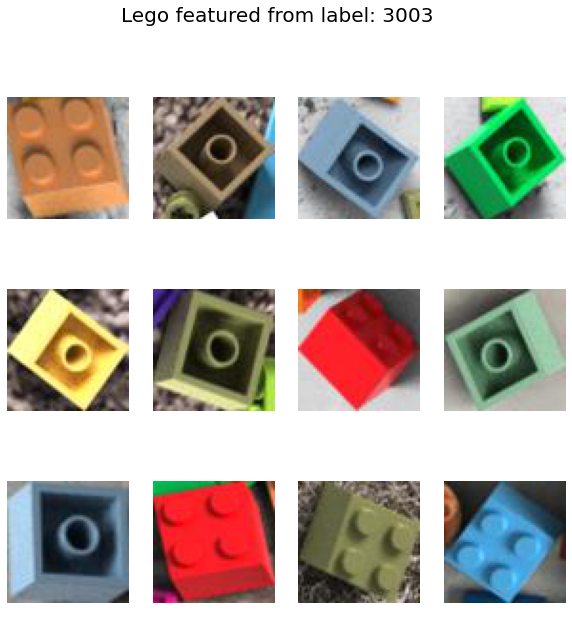

In [110]:
view_random_images(directory="lego/test", 
                   num_img=12)

In [11]:
# Setup the training, testing, and validation directories
train_dir = "lego/train/"
test_dir = "lego/test/"
val_dir = "lego/val/"

# Creating a baseline Convolutional Neural Network with baseline model

## Preprocess the data in order to prepare it for the model

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_generation = ImageDataGenerator(rescale=1/255.)
test_data_generation = ImageDataGenerator(rescale=1/255.)
val_data_generation = ImageDataGenerator(rescale=1/255.)

In [13]:
len(class_names)

200

In [14]:
os.remove("lego/train/10247/2260.jpg")

In [15]:
# Resize the image (normal shape of the image described by the author is 64x64, halfing the resolution should still maintain accuracy)
target_size = (32, 32)

# Load the data through flowing from the directory
# Note: batch size is set to default (32) and class mode is set to default (categorical)
train_data = train_data_generation.flow_from_directory(train_dir,
                                                       target_size)

test_data = test_data_generation.flow_from_directory(test_dir,
                                                     target_size)

val_data = val_data_generation.flow_from_directory(val_dir,
                                                   target_size)

# Note: One image was deleted since it was corrupted

Found 639999 images belonging to 200 classes.
Found 80000 images belonging to 200 classes.
Found 80000 images belonging to 200 classes.


## Create the baseline model

In [16]:
import tensorflow as tf

tf.random.set_seed(42)

baseline_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(20, 3, activation=tf.keras.activations.relu, input_shape=(32, 32, 3)),
  tf.keras.layers.Conv2D(20, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(20, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.Conv2D(20, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation=tf.keras.activations.softmax)
])

baseline_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

## Fit the baseline model

In [17]:
history_baseline_model = baseline_model.fit(train_data,
                                            epochs=5,
                                            validation_data=val_data)

Epoch 1/5
20000/20000 [==============================] - 650s 31ms/step - loss: 3.0618 - accuracy: 0.2703 - val_loss: 2.4992 - val_accuracy: 0.3621
Epoch 2/5
20000/20000 [==============================] - 342s 17ms/step - loss: 2.3055 - accuracy: 0.4030 - val_loss: 2.2436 - val_accuracy: 0.4114
Epoch 3/5
20000/20000 [==============================] - 271s 14ms/step - loss: 2.1116 - accuracy: 0.4440 - val_loss: 2.0929 - val_accuracy: 0.4461
Epoch 4/5
20000/20000 [==============================] - 270s 13ms/step - loss: 2.0053 - accuracy: 0.4668 - val_loss: 2.0022 - val_accuracy: 0.4647
Epoch 5/5
20000/20000 [==============================] - 267s 13ms/step - loss: 1.9239 - accuracy: 0.4847 - val_loss: 1.9610 - val_accuracy: 0.4762


In [18]:
# Plot the validation and training curves
def plot_loss_curves(history):
  """
  returns separate loss curves for training and validation metrics
  """
  # Separate variables
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="validation_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="validation_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

## Visualizing the data and determining the model's accuracy with personal tests

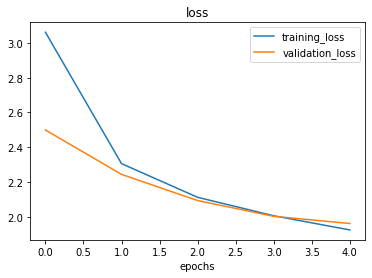

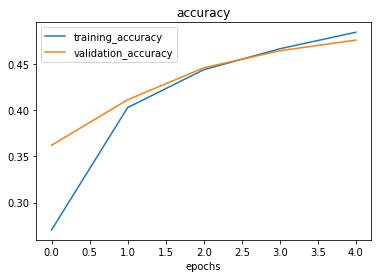

In [19]:
plot_loss_curves(history_baseline_model)

In [22]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 20)        560       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 20)        3620      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 20)        3620      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 20)        3620      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 500)               0

In [23]:
baseline_model.evaluate(test_data)

2500/2500 [==============================] - 64s 25ms/step - loss: 1.9385 - accuracy: 0.4802


[1.9385486841201782, 0.4801500141620636]

Our accuracy is 48.02% !!! This is a pretty good baseline convolutional neural network baseline.

Since our model is pretty good, let's try it out on a prediction. I uploaded several images of my own legos.

In [61]:
def image_display(directory):
  """
  Given a file of images, displays all of the images
  """
  fig = plt.figure(figsize=(12, 3))
  plt.title(f"Lego featured from directory: {directory}")
  plt.axis(False)
  
  # finds the amount of files from the directory and sets the path of the images
  total_files = len([item.name for item in pathlib.Path(directory).glob('*')])
  image_path = os.listdir(directory)

  # iterates through every image and adds it to a subplot
  for i in range(1,total_files+1):
    img = mpimg.imread(directory + "/" + image_path[i-1])
    fig.add_subplot(1, total_files, i)
    plt.imshow(img)
    plt.axis(False)
  plt.show()

In [34]:
# Obtain the file of my legoes/legos? and unzip
!wget wget -v -O 8f6q9k7v1dbx8tjo6tw5zzwk9kjue9he.zip -L https://rpi.box.com/shared/static/8f6q9k7v1dbx8tjo6tw5zzwk9kjue9he.zip

--2021-08-19 17:22:53--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-08-19 17:22:53--  https://rpi.box.com/shared/static/8f6q9k7v1dbx8tjo6tw5zzwk9kjue9he.zip
Resolving rpi.box.com (rpi.box.com)... 107.152.25.197
Connecting to rpi.box.com (rpi.box.com)|107.152.25.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/8f6q9k7v1dbx8tjo6tw5zzwk9kjue9he.zip [following]
--2021-08-19 17:22:54--  https://rpi.box.com/public/static/8f6q9k7v1dbx8tjo6tw5zzwk9kjue9he.zip
Reusing existing connection to rpi.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://rpi.app.box.com/public/static/8f6q9k7v1dbx8tjo6tw5zzwk9kjue9he.zip [following]
--2021-08-19 17:22:54--  https://rpi.app.box.com/public/static/8f6q9k7v1dbx8tjo6tw5zzwk9kjue9he.zip
Resolving rpi.app.box.com (rpi.app.box.com)... 107.152.25.201
Connecting to rpi.app.box.com (rp

In [35]:
# Unzip the data
zip = zipfile.ZipFile("8f6q9k7v1dbx8tjo6tw5zzwk9kjue9he.zip")
zip.extractall()
zip.close()

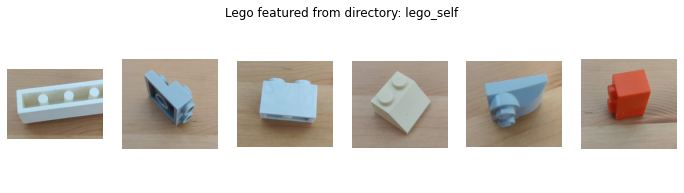

In [59]:
image_display("lego_self")

In [63]:
# The image will need to be resized in order to be used with the model
def reshape_image(filename, img_shape=32):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  """
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor and resize it
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Normalize the image
  img /= 255.
  return img

In [65]:
# Reconfigure the prediction
def prediction_model(model, filename, class_names=class_names, img_shape=32):
  """
  This function makes a prediction given the model.
  Arguments:
  - model: the model used to fit the data
  - filename: the file of the image that will be used to determine the prediction
  - class_names: the labels of the data
  - img_shape: the image shape (default set to 32)
  """
  # loads and preps the image and then predicts
  pred = model.predict(tf.expand_dims(reshape_image(filename), axis=0))

  # Add in logic for multi-class predictions
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # visualize the prediction
  lego = mpimg.imread(filename)
  plt.imshow(lego)
  plt.axis(False)
  plt.title(f"This lego piece is from the label of '{pred_class}''")

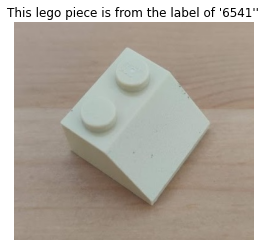

In [67]:
prediction_model(baseline_model, "lego_self/IMG_20210818_143239.jpg")

In [93]:
# Making a more advanced prediction model, since we cant really tell which label of lego "6541" is, we should visualize it
def prediction_model(model, filename, class_names=class_names, img_shape=32):
  """
  This function makes a prediction given the model.
  Arguments:
  - model: the model used to fit the data
  - filename: the file of the image that will be used to determine the prediction
  - class_names: the labels of the data
  - img_shape: the image shape (default set to 32)
  """
  # loads and preps the image and then predicts
  pred = model.predict(tf.expand_dims(reshape_image(filename), axis=0))

  # Add in logic for multi-class predictions
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # visualize the prediction
  fig = plt.figure(figsize=(6,4))
  fig.suptitle(f"This lego piece is from the label of '{pred_class}''", fontsize=20)
  fig.add_subplot(1, 3, 1)
  lego = mpimg.imread(filename)
  plt.imshow(lego)
  plt.axis(False)
  plt.title("This is the predicted lego")
  # compare the prediction to two different random legos with the same label
  random_image_path = random.sample(os.listdir("64/"+pred_class), 2)
  fig.add_subplot(1, 3, 2)
  lego_data = mpimg.imread("64/"+pred_class+"/"+random_image_path[0])
  plt.imshow(lego_data)
  plt.axis(False)
  fig.add_subplot(1, 3, 3)
  lego_data = mpimg.imread("64/"+pred_class+"/"+random_image_path[1])
  plt.imshow(lego_data)
  plt.axis(False)

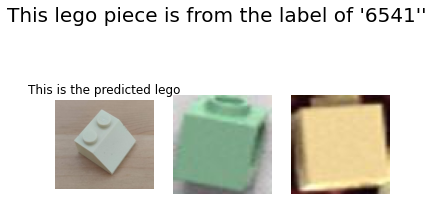

In [94]:
prediction_model(baseline_model, "lego_self/IMG_20210818_143239.jpg")

In [131]:
# Make the prediction model go through all of the lego_self folder
def mass_prediction(directory):
  fig = plt.figure(figsize=(15,30))
  image_names = np.array([item.name for item in pathlib.Path(directory).glob("*")])
  count = 1
  for image in image_names:
    prediction_model(baseline_model, directory+"/"+image)

<Figure size 1080x2160 with 0 Axes>

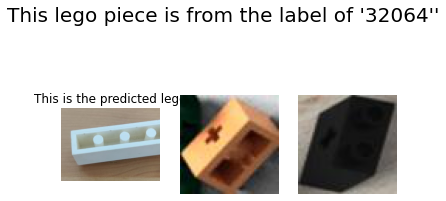

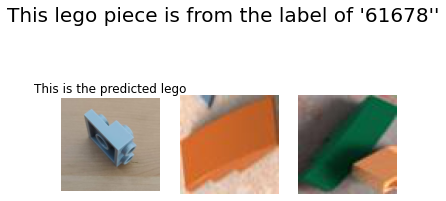

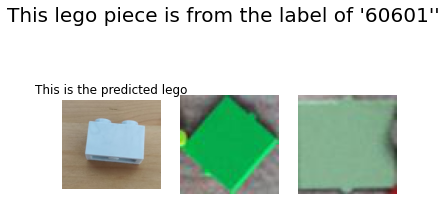

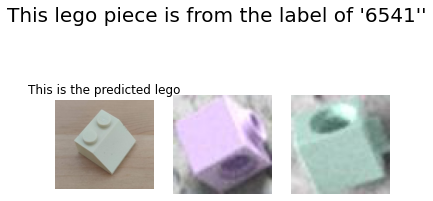

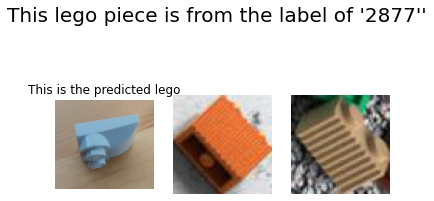

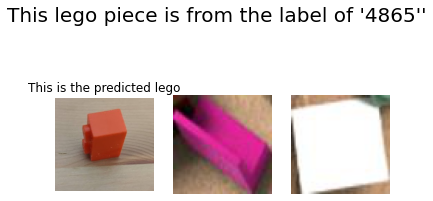

In [132]:
mass_prediction("lego_self")

## The baseline decisions:
* every piece was incorrect at guessing
* certain pieces such as the first, and third images are close to what the shape should resemble
* inconclusive evidence to provide the justification of what the piece should be from the model